**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 3 max, and fill in below details
Group member detail(s): \
1. Awang Amir Zakwan bin Awang Mahmud - 21B6013
2. Azeema Nasrin Bazrul Jama - 22B2032
3. Muhamad Sufi bin Sofri - 21B2114

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from google.colab import files
from PIL import Image

In [ ]:
# Set the device to GPU if available, otherwise, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Define the modified neural network architecture for CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [ ]:
BATCH_SIZE = 64
LEARNING_RATE = 1e-1
EPOCH = 20
accList = []    # Stores accuracy
lossList = []   # Stores loss

In [ ]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples
        loss = running_loss/len(train_loader)
        accList.append(accuracy)
        lossList.append(loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy}")
    print("Training complete!")


In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 47414332.37it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# Load and preprocess the CFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#TODO: Complete below line to import CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data/', train=True,download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [ ]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [ ]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)

Epoch 1/20, Loss: 1.7331, Accuracy: 36.97
Epoch 2/20, Loss: 1.5900, Accuracy: 43.17
Epoch 3/20, Loss: 1.5234, Accuracy: 46.514
Epoch 4/20, Loss: 1.4749, Accuracy: 48.702
Epoch 5/20, Loss: 1.4182, Accuracy: 51.29
Epoch 6/20, Loss: 1.3866, Accuracy: 52.696
Epoch 7/20, Loss: 1.3788, Accuracy: 53.348
Epoch 8/20, Loss: 1.3418, Accuracy: 54.608
Epoch 9/20, Loss: 1.3279, Accuracy: 55.44
Epoch 10/20, Loss: 1.3288, Accuracy: 55.734
Epoch 11/20, Loss: 1.3077, Accuracy: 56.666
Epoch 12/20, Loss: 1.2826, Accuracy: 57.814
Epoch 13/20, Loss: 1.3093, Accuracy: 57.198
Epoch 14/20, Loss: 1.3180, Accuracy: 57.3
Epoch 15/20, Loss: 1.3028, Accuracy: 57.754
Epoch 16/20, Loss: 1.3271, Accuracy: 57.5
Epoch 17/20, Loss: 1.3142, Accuracy: 57.882
Epoch 18/20, Loss: 1.3238, Accuracy: 58.104
Epoch 19/20, Loss: 1.3818, Accuracy: 56.562
Epoch 20/20, Loss: 1.3277, Accuracy: 58.362
Training complete!


Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?
*   Were there any challenges or limitations you encountered while using the GPU for training?
*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?

Task 3: Visualize Loss and Accuracy


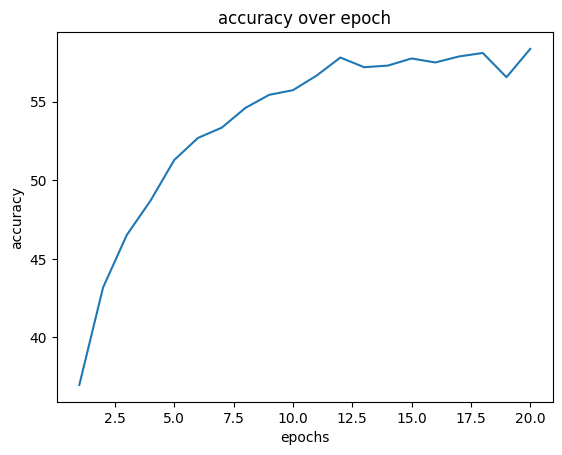

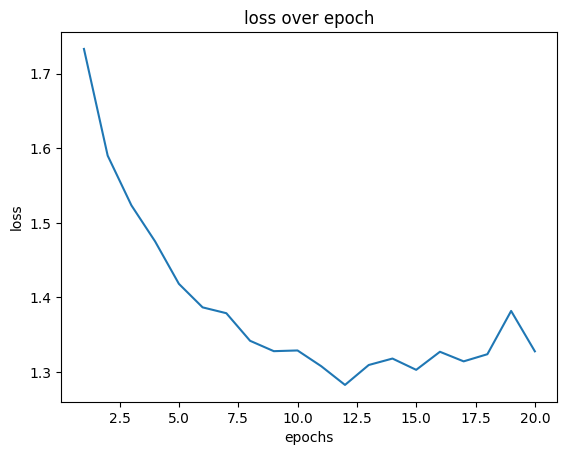

In [ ]:
#TODO:
#Your plots goes here

import matplotlib.pyplot as plt # plotting library
import math                     # used to compare with nan values

# make epoch plot points
epochs = []
for i in range(EPOCH):
  epochs.append(i+1)

plt.plot(epochs, accList)
plt.title("accuracy over epoch")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

if not all(math.isnan(x) for x in lossList):
  plt.plot(epochs, lossList)
  plt.title("loss over epoch")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()
else:   # if no loss, cannot plot
  print("There is no loss to visualize")

In [ ]:
# Calculate Average Loss and Accuracy
accSum = 0
lossSum = 0

for i in range(len(epochs)):
  accSum += accList[i]
  lossSum += lossList[i]

print(f"Average Accuracy = {accSum/len(epochs):2f}")
print(f"Average Loss = {lossSum/len(epochs):2f}")

Average Accuracy = 53.680700
Average Loss = 1.384928


# Runtime Findings - Record the different results

####**State if you're using GPU or CPU (Remove this line before sending)**
1) First Run (GPU)
* Batch Size       = 64
* Learning Rate    = 1e-5
* Number of Epochs = 10
* Time to train    = 2.5 mins
* Average Loss     = 2.298277
* Average Accuracy = 12.980200
* Highest Accuracy = 15.369
* Other notes      = Accuracy graph increases exponentially and slows down at the end. Loss graph shows a linear decrease.

2) Second Run (CPU)
* Batch Size       = 64
* Learning Rate    = 1e-5
* Number of Epochs = 10
* Time to train    = 7.5 mins
* Average Loss     = 2.300866
* Average Accuracy = 11.522200
* Highest Accuracy = 12.71
* Other notes      = Accuracy graph shows an exponential but slower ascent than with GPU. Loss remains linear.

3) Third Run (GPU)
* Batch Size       = 32
* Learning Rate    = 1e10
* Number of Epochs = 15
* Time to train    = 4 mins
* Average Loss     = NaN
* Average Accuracy = 10.000267
* Highest Accuracy = 10.0040
* Other notes      = Accuracy graph becomes constant once the 2nd epoch was reached

4) Fourth Run (CPU)
* Batch Size       = 32
* Learning Rate    = 1e10
* Number of Epochs = 15
* Time to train    = 11.5 mins
* Average Loss     = NaN
* Average Accuracy = 10.000533
* Highest Accuracy = 10.008
* Other notes      = Accuracy graph becomes constant as it reaches the 2nd epoch, but initial accuracy is higher. Time is way longer

5) Fifth Run (GPU)
* Batch Size       = 16
* Learning Rate    = 1e15
* Number of Epochs = 20
* Time to train    = 6.5
* Average Loss     = NaN
* Average Accuracy = 9.999700
* Highest Accuracy = 10.0
* Other notes      = Accuracy graph bcecomes constant at the second epoch.

6) Sixth Run (CPU)
* Batch Size       = 16
* Learning Rate    = 1e15
* Number of Epochs = 20
* Time to train    = 12.5
* Average Loss     = NaN
* Average Accuracy = 10.000100
* Highest Accuracy = 10.002
* Other notes      = Accuracy decreases from the first epoch to the second and remains constant afterwards.

Conclusion:
1. Key differences observed in the training speed between GPU and CPU:

- The training speed when using GPU is considerably faster, with GPU taking 5 to 7.5 minutes less compared to CPU.

2. Challenges or limitations encountered while using the GPU for training:

- No difficulties were met during these training sessions.

3. Impact on the final model's perfomance (accuracy and loss) when trained on the GPU versus the CPU:


Loss: Not heavily impacted.

- Between the first and second run (GPU and CPU respectively), loss had a difference of less than 0.01 with the average loss being higher in CPU.
- Beginning from the third to sixth run, NaN (Not a Number) value was obtained for all epochs.


Accuracy:

- Between the first and second run (GPU and CPU respectively), accuracy was better in GPU.
- From the third to sixth run, accuracy was better in CPU.

It could be said that GPU is better equipped to handle batch sizes while CPU is more suitable to process learning rates.

The optimal learning rate for this image classifier is 1e-1.

In [ ]:
# Table showing the differences observed in each category for all training sessions
%%html
<iframe src="https://drive.google.com/file/d/1s-Z07bk8B7EJrhlvEAc6SH_WNBaRIdoJ/preview" width="1000" height="480" allow="autoplay"></iframe>

In [ ]:
# Table showing the different parameters used to find the optimal learning rate
# with batch size 64 and 20 epochs
%%html
<iframe src="https://drive.google.com/file/d/1KEm2lOA4QG72RsBI_lSO9zOiGXDGhRne/preview" width="1000" height="480" allow="autoplay"></iframe>

<ipython-input-26-d32f0d8ad91e>:11: UserWarning: Legend does not support handles for float instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend((avg_accuracy), (avg_loss))


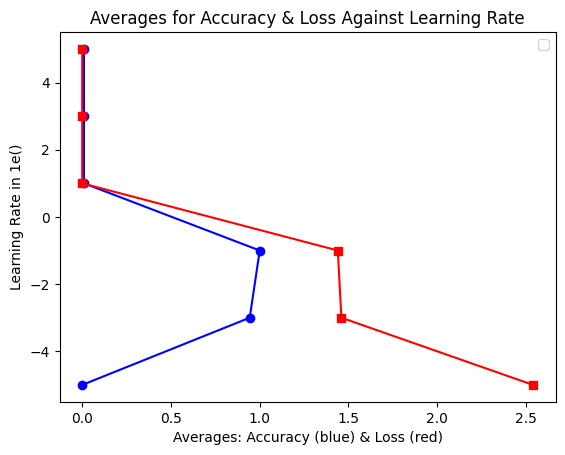

In [ ]:
import seaborn as sns
%matplotlib inline
learning_rate = (-5, -3, -1, 1, 3, 5)
avg_accuracy = [0.000000, 0.943726, 1.000000, 0.009974, 0.009960, 0.009958]
avg_loss = [2.54, 1.46, 1.44, 0.0, 0.0, 0.0]
plt.plot(avg_accuracy, learning_rate, marker = 'o', c = 'b')
plt.plot(avg_loss, learning_rate, marker = 's', c = 'r')
plt.xlabel("Averages: Accuracy (blue) & Loss (red)")
plt.ylabel("Learning Rate in 1e()")
plt.title("Averages for Accuracy & Loss Against Learning Rate")
plt.legend((avg_accuracy), (avg_loss))
plt.show()

Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
   transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload)
    model.to("cpu")  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    print(f"Predicted labels: {predicted_idx}")

In [ ]:
# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")

Saving download.jfif to download (1).jfif
Predicted labels: tensor([3])
